# DonorSearch

## Заказчик

### Чем занимается DonorSearch?


**Мы мотивируем людей становиться донорами. С DonorSearch легче пройти
путь от первой донации к регулярным и к званию Почетного донора. Но это
не основная наша задача…**  
  
Кто-то говорит, что донорской крови не хватает, в то же время в центрах
крови могут отказывать в донации из-за переизбытка крови на складе. Мы в
DonorSearch знаем, что эта проблема актуальная для всего мира. И мы знаем,
как ее решить.

### Цель проекта



Увеличить количество доноров. Вовлекать больше существующих доноров.  


### Задачи

Ответить на вопросы:
 - Составить портрет донора
 - Как привлекать больше пользователей?
 - Как вовлекать существующих пользователей?
 - Какие статьи лучше конвертируют в регистрацию и донацию?

### Данные


Пользовательские данные из базы
 - Донации
 - Пользователи
 - Планирование донации

### Ожидаемый результат

**Google Colab**  
  
 - Обзор данных
 - Исследовательский анализ данных
 - Ответы на вопросы заказчика
 - Выводы и рекомендации

### Презентация


 - Любые аномалии, интересные закономерности в данных, которые вы
нашли
 - Ответы на вопросы заказчика
 - Выводы и рекомендации

---

## 1) Выгрузка

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt  
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})           

import random 
import string

from io import BytesIO                     
import requests

from tqdm.notebook import tqdm            

### 1.1 df_donations

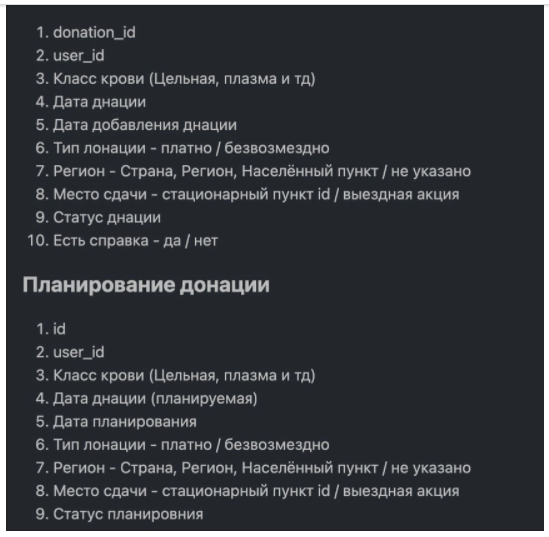

In [2]:
df_donations = pd.read_csv('/content/drive/MyDrive/Проект DonorSearch/donations_anon.csv', encoding='utf-8', sep=',')
print(df_donations.shape)
df_donations.head(5)

(97874, 10)


,ID,ID пользователя,Класс крови,Дата донации,Дата добавления донации,Тип донации,Регион,Место стадчи,Статус донации,Есть справка
0,97920,151894,Плазма,02.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",647,На модерации,Да
1,97919,156916,Тромбоциты,02.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",633,На модерации,Да
2,97918,149413,Цельная кровь,01.06.2021,02.06.2021,Безвозмездно,"Россия, Приморский край, Владивосток",325,Принята,Да
3,97917,155027,Цельная кровь,02.06.2021,02.06.2021,Безвозмездно,"Россия, Саратовская область, Саратов",500,Принята,Да
4,97916,151094,Цельная кровь,23.04.2021,02.06.2021,Безвозмездно,"Россия, Свердловская область, Екатеринбург",509,Принята,Да


In [3]:
df_donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97874 entries, 0 to 97873
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       97874 non-null  int64 
 1   ID пользователя          97874 non-null  int64 
 2   Класс крови              97874 non-null  object
 3   Дата донации             97874 non-null  object
 4   Дата добавления донации  97874 non-null  object
 5   Тип донации              97874 non-null  object
 6   Регион                   97874 non-null  object
 7   Место стадчи             97874 non-null  object
 8   Статус донации           97874 non-null  object
 9   Есть справка             97874 non-null  object
dtypes: int64(2), object(8)
memory usage: 7.5+ MB


In [4]:
df_donations[df_donations['Дата донации'] == "31.05.2021"].query('Регион == "Россия, Санкт-Петербург"')

,ID,ID пользователя,Класс крови,Дата донации,Дата добавления донации,Тип донации,Регион,Место стадчи,Статус донации,Есть справка
36,97884,1827,Цельная кровь,31.05.2021,31.05.2021,Безвозмездно,"Россия, Санкт-Петербург",775,Принята,Да
41,97879,149849,Цельная кровь,31.05.2021,31.05.2021,Безвозмездно,"Россия, Санкт-Петербург",775,Принята,Да


In [5]:
df_donations[df_donations['ID пользователя'] == 1827]

,ID,ID пользователя,Класс крови,Дата донации,Дата добавления донации,Тип донации,Регион,Место стадчи,Статус донации,Есть справка
36,97884,1827,Цельная кровь,31.05.2021,31.05.2021,Безвозмездно,"Россия, Санкт-Петербург",775,Принята,Да
1477,96440,1827,Цельная кровь,14.01.2013,07.04.2021,Безвозмездно,"Россия, Санкт-Петербург",756,Принята,Да
1478,96439,1827,Цельная кровь,13.11.2012,07.04.2021,Безвозмездно,"Россия, Санкт-Петербург",756,Принята,Да
1480,96437,1827,Цельная кровь,15.05.2013,07.04.2021,Безвозмездно,"Россия, Санкт-Петербург",756,Принята,Да
1481,96436,1827,Цельная кровь,12.09.2012,07.04.2021,Безвозмездно,"Россия, Санкт-Петербург",756,Принята,Да
1792,96125,1827,Цельная кровь,30.03.2021,30.03.2021,Безвозмездно,"Россия, Санкт-Петербург",775,Принята,Да
1935,95982,1827,Цельная кровь,19.11.2015,24.03.2021,Безвозмездно,"Россия, Санкт-Петербург",658,Принята,Да
1936,95981,1827,Цельная кровь,16.10.2014,24.03.2021,Безвозмездно,"Россия, Санкт-Петербург",658,Принята,Да
1937,95980,1827,Цельная кровь,28.01.2016,24.03.2021,Безвозмездно,"Россия, Санкт-Петербург",658,Принята,Да
1938,95979,1827,Цельная кровь,21.03.2013,24.03.2021,Безвозмездно,"Россия, Санкт-Петербург",658,Принята,Да


- нашел себя =))

---

### 1.2 df_plan

In [6]:
df_plan = pd.read_csv('/content/drive/MyDrive/Проект DonorSearch/plan_anon.csv', encoding='utf-8', sep=',')
print(df_plan.shape)
df_plan.head(5)

(1412, 9)


,ID,ID пользователя,Класс крови,Дата донации,Дата планирования,Тип донации,Регион,Место стадчи,Есть справка
0,1413,141999,Цельная кровь,03.06.2021,02.06.2021,Безвозмездно,"Россия, Санкт-Петербург",711,донация запланирована
1,1412,158695,Цельная кровь,04.06.2021,02.06.2021,Безвозмездно,"Россия, Санкт-Петербург",660,донация запланирована
2,1411,156916,Тромбоциты,23.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",633,донация запланирована
3,1410,156916,Тромбоциты,03.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",633,планирование отменено
4,1409,158694,Цельная кровь,03.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",765,донация запланирована


In [7]:
df_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1412 non-null   int64 
 1   ID пользователя    1412 non-null   int64 
 2   Класс крови        1412 non-null   object
 3   Дата донации       1412 non-null   object
 4   Дата планирования  1412 non-null   object
 5   Тип донации        1412 non-null   object
 6   Регион             1412 non-null   object
 7   Место стадчи       1412 non-null   object
 8   Есть справка       1412 non-null   object
dtypes: int64(2), object(7)
memory usage: 99.4+ KB


In [8]:
df_plan[df_plan['ID пользователя'] == 1827]

,ID,ID пользователя,Класс крови,Дата донации,Дата планирования,Тип донации,Регион,Место стадчи,Есть справка
522,891,1827,Цельная кровь,03.06.2021,31.03.2021,Безвозмездно,"Россия, Санкт-Петербург",Выездная акция,донация запланирована
1113,299,1827,Цельная кровь,15.03.2021,14.01.2021,Безвозмездно,"Россия, Санкт-Петербург",Выездная акция,планирование отменено


---

### 1.3 df_users

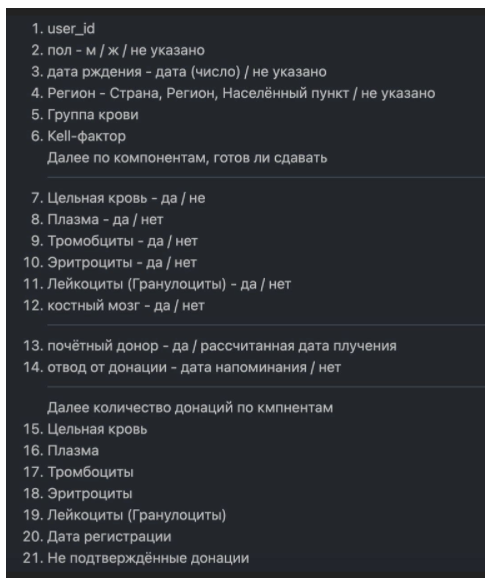

In [9]:
df_users = pd.read_csv('/content/drive/MyDrive/Проект DonorSearch/users_anon.csv', encoding='utf-8', sep=',')
print(df_users.shape)
df_users.head(5)

(158092, 21)


,ID,Пол,Дата рождения,Регион,Группа крови,Kell-фактор,Цельная кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный мозг,Почетный донор,Отвод от донации,Цельная кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата регистрации,Не подтверждённые донации
0,158697,Мужской,02.05.1986,"Россия, Москва",Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2021,0
1,158696,Мужской,Не указано,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2021,0
2,158695,Женский,21.02.1995,"Россия, Санкт-Петербург",O(I) Rh+,Не знаю,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2021,0
3,158694,Женский,11.08.2002,"Россия, Москва",Не знаю,Не знаю,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2021,0
4,158690,Не указано,Не указано,Не указано,O(I) Rh+,Не указано,Да,Нет,Нет,Нет,Нет,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2021,0


In [10]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158092 entries, 0 to 158091
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         158092 non-null  int64 
 1   Пол                        158092 non-null  object
 2   Дата рождения              158092 non-null  object
 3   Регион                     158092 non-null  object
 4   Группа крови               158092 non-null  object
 5   Kell-фактор                158092 non-null  object
 6   Цельная кровь              158092 non-null  object
 7   Плазма                     158092 non-null  object
 8   Тромбоциты                 158092 non-null  object
 9   Эритроциты                 158092 non-null  object
 10  Лейкоциты                  158092 non-null  object
 11  Костный мозг               158092 non-null  object
 12  Почетный донор             158092 non-null  object
 13  Отвод от донации           158092 non-null  

In [11]:
df_users[df_users['ID'] == 1827]

,ID,Пол,Дата рождения,Регион,Группа крови,Kell-фактор,Цельная кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный мозг,Почетный донор,Отвод от донации,Цельная кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата регистрации,Не подтверждённые донации
7864,1827,Мужской,21.04.1990,"Россия, Санкт-Петербург",O(I) Rh+,Положительный,Да,Да,Нет,Нет,Нет,Нет,28.04.2022,Нет,18,0,0,0,0,31.08.2020,0


---

## 2) Предобработка

### 2.1 df_donations

In [12]:
df_donations.head()

,ID,ID пользователя,Класс крови,Дата донации,Дата добавления донации,Тип донации,Регион,Место стадчи,Статус донации,Есть справка
0,97920,151894,Плазма,02.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",647,На модерации,Да
1,97919,156916,Тромбоциты,02.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",633,На модерации,Да
2,97918,149413,Цельная кровь,01.06.2021,02.06.2021,Безвозмездно,"Россия, Приморский край, Владивосток",325,Принята,Да
3,97917,155027,Цельная кровь,02.06.2021,02.06.2021,Безвозмездно,"Россия, Саратовская область, Саратов",500,Принята,Да
4,97916,151094,Цельная кровь,23.04.2021,02.06.2021,Безвозмездно,"Россия, Свердловская область, Екатеринбург",509,Принята,Да


In [13]:
df_donations.columns = df_donations.columns.str.replace(' ','_')
df_donations.columns

Index(['ID', 'ID_пользователя', 'Класс_крови', 'Дата_донации',
       'Дата_добавления_донации', 'Тип_донации', 'Регион', 'Место_стадчи',
       'Статус_донации', 'Есть_справка'],
      dtype='object')

In [14]:
df_donations.shape

(97874, 10)

In [15]:
df_donations['ID_пользователя'].nunique()

25414

In [16]:
df_donations['Дата_донации'] = pd.to_datetime(df_donations['Дата_донации'], format='%d.%m.%Y', errors='coerce')
df_donations['Дата_добавления_донации'] = pd.to_datetime(df_donations['Дата_добавления_донации'], format='%d.%m.%Y', errors='coerce')
df_donations.dtypes

ID                                  int64
ID_пользователя                     int64
Класс_крови                        object
Дата_донации               datetime64[ns]
Дата_добавления_донации    datetime64[ns]
Тип_донации                        object
Регион                             object
Место_стадчи                       object
Статус_донации                     object
Есть_справка                       object
dtype: object

In [17]:
print('начало: ', str(df_donations['Дата_донации'].min()).split()[0])
print('конец: ', str(df_donations['Дата_донации'].max()).split()[0])
print('период: ', str(df_donations['Дата_донации'].max() - df_donations['Дата_донации'].min()).split()[0], 'дней')

начало:  1901-11-21
конец:  2107-09-06
период:  75164 дней


- аномалия дат донаций

In [18]:
df_donations['Класс_крови'].value_counts(dropna=False)

Цельная кровь              67748
Плазма                     19344
Тромбоциты                 10362
Эритроциты                   337
Гранулоциты (Лейкоциты)       83
Name: Класс_крови, dtype: int64

In [19]:
df_donations['Тип_донации'].value_counts(dropna=False)

Безвозмездно    90889
Платно           6985
Name: Тип_донации, dtype: int64

In [20]:
df_donations['Регион'].value_counts(dropna=False)

Не указано                                  92160
Россия, Москва                               1885
Россия, Татарстан, Казань                     514
Россия, Санкт-Петербург                       493
Россия, Татарстан, Набережные Челны           163
                                            ...  
Россия, Краснодарский край, Новороссийск        1
Россия, Московская область, Ступино             1
Россия, Красноярский край, Ачинск               1
Россия, Липецкая область, Усмань                1
Россия, Краснодарский край, Тихорецк            1
Name: Регион, Length: 267, dtype: int64

In [21]:
df_donations['Место_стадчи'].value_counts(dropna=False)

Выездная акция    8982
633               6036
176               2504
641               2084
619               1784
                  ... 
757                  1
1068                 1
6                    1
43                   1
544                  1
Name: Место_стадчи, Length: 776, dtype: int64

In [22]:
df_donations['Статус_донации'].value_counts(dropna=False)

Принята         88711
Без справки      6287
Удалена          2670
Отклонена         204
На модерации        2
Name: Статус_донации, dtype: int64

In [23]:
df_donations['Есть_справка'].value_counts(dropna=False)

Да     96848
Нет     1026
Name: Есть_справка, dtype: int64

---

### 2.2 df_plan

In [24]:
df_plan.head()

,ID,ID пользователя,Класс крови,Дата донации,Дата планирования,Тип донации,Регион,Место стадчи,Есть справка
0,1413,141999,Цельная кровь,03.06.2021,02.06.2021,Безвозмездно,"Россия, Санкт-Петербург",711,донация запланирована
1,1412,158695,Цельная кровь,04.06.2021,02.06.2021,Безвозмездно,"Россия, Санкт-Петербург",660,донация запланирована
2,1411,156916,Тромбоциты,23.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",633,донация запланирована
3,1410,156916,Тромбоциты,03.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",633,планирование отменено
4,1409,158694,Цельная кровь,03.06.2021,02.06.2021,Безвозмездно,"Россия, Москва",765,донация запланирована


In [25]:
df_plan.columns = df_plan.columns.str.replace(' ','_')
df_plan.columns

Index(['ID', 'ID_пользователя', 'Класс_крови', 'Дата_донации',
       'Дата_планирования', 'Тип_донации', 'Регион', 'Место_стадчи',
       'Есть_справка'],
      dtype='object')

In [26]:
df_plan.shape

(1412, 9)

In [27]:
df_plan['ID_пользователя'].nunique()

930

In [28]:
df_plan['Дата_донации'] = pd.to_datetime(df_plan['Дата_донации'], format='%d.%m.%Y', errors='coerce')
df_plan['Дата_планирования'] = pd.to_datetime(df_plan['Дата_планирования'], format='%d.%m.%Y', errors='coerce')
df_plan.dtypes

ID                            int64
ID_пользователя               int64
Класс_крови                  object
Дата_донации         datetime64[ns]
Дата_планирования    datetime64[ns]
Тип_донации                  object
Регион                       object
Место_стадчи                 object
Есть_справка                 object
dtype: object

In [29]:
print('начало: ', str(df_plan['Дата_донации'].min()).split()[0])
print('конец: ', str(df_plan['Дата_донации'].max()).split()[0])
print('период: ', str(df_plan['Дата_донации'].max() - df_plan['Дата_донации'].min()).split()[0], 'дней')

начало:  2020-11-20
конец:  2021-09-13
период:  297 дней


In [30]:
df_plan['Класс_крови'].value_counts(dropna=False)

Цельная кровь              996
Плазма                     236
Тромбоциты                 177
Эритроциты                   2
Гранулоциты (Лейкоциты)      1
Name: Класс_крови, dtype: int64

In [31]:
df_plan['Тип_донации'].value_counts(dropna=False)

Безвозмездно    1238
Платно           174
Name: Тип_донации, dtype: int64

In [32]:
df_plan['Регион'].value_counts(dropna=False)

Россия, Москва                                       396
Россия, Татарстан, Казань                            155
Россия, Санкт-Петербург                              151
Россия, Татарстан, Набережные Челны                   30
Россия, Свердловская область, Екатеринбург            28
                                                    ... 
Украина, Херсонская область, Херсон                    1
Россия, Владимирская область, Ковров                   1
Казахстан, Западно-Казахстанская область, Уральск      1
Россия, Ненецкий АО, Нарьян-Мар                        1
Россия, Северная Осетия - Алания, Владикавказ          1
Name: Регион, Length: 207, dtype: int64

In [33]:
df_plan['Место_стадчи'].value_counts(dropna=False)

Выездная акция    728
838                62
716                38
633                38
641                22
                 ... 
1069                1
734                 1
42                  1
382                 1
393                 1
Name: Место_стадчи, Length: 204, dtype: int64

In [34]:
df_plan['Есть_справка'].value_counts(dropna=False)

донация запланирована                634
запланированная донация добавлена    440
планирование отменено                338
Name: Есть_справка, dtype: int64

---

### 2.3 df_users

In [35]:
df_users.head(2)

,ID,Пол,Дата рождения,Регион,Группа крови,Kell-фактор,Цельная кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный мозг,Почетный донор,Отвод от донации,Цельная кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата регистрации,Не подтверждённые донации
0,158697,Мужской,02.05.1986,"Россия, Москва",Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2021,0
1,158696,Мужской,Не указано,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,02.06.2021,0


In [36]:
df_users.columns = df_users.columns.str.replace(' ','_')
df_users.columns

Index(['ID', 'Пол', 'Дата_рождения', 'Регион', 'Группа_крови', 'Kell-фактор',
       'Цельная_кровь', 'Плазма', 'Тромбоциты', 'Эритроциты', 'Лейкоциты',
       'Костный_мозг', 'Почетный_донор', 'Отвод_от_донации', 'Цельная_кровь.1',
       'Плазма.1', 'Тромбоциты.1', 'Эритроциты.1', 'Лейкоциты.1',
       'Дата_регистрации', 'Не_подтверждённые_донации'],
      dtype='object')

In [37]:
df_users.shape

(158092, 21)

In [38]:
df_users['ID'].nunique()

158092

In [39]:
df_users[df_users['Дата_рождения'] == 'Не указано'].shape[0]

131199

In [40]:
df_users['Дата_рождения'] = df_users['Дата_рождения'].replace('Не указано','01.01.1800')

In [41]:
df_users['Дата_регистрации'] = pd.to_datetime(df_users['Дата_регистрации'], format='%d.%m.%Y', errors='coerce')
df_users['Дата_рождения'] = pd.to_datetime(df_users['Дата_рождения'], format='%d.%m.%Y', errors='coerce')
df_users.dtypes

ID                                    int64
Пол                                  object
Дата_рождения                datetime64[ns]
Регион                               object
Группа_крови                         object
Kell-фактор                          object
Цельная_кровь                        object
Плазма                               object
Тромбоциты                           object
Эритроциты                           object
Лейкоциты                            object
Костный_мозг                         object
Почетный_донор                       object
Отвод_от_донации                     object
Цельная_кровь.1                       int64
Плазма.1                              int64
Тромбоциты.1                          int64
Эритроциты.1                          int64
Лейкоциты.1                           int64
Дата_регистрации             datetime64[ns]
Не_подтверждённые_донации             int64
dtype: object

In [42]:
print('начало: ', str(df_users['Дата_регистрации'].min()).split()[0])
print('конец: ', str(df_users['Дата_регистрации'].max()).split()[0])
print('период: ', str(df_users['Дата_регистрации'].max() - df_users['Дата_регистрации'].min()).split()[0], 'дней')

начало:  2018-04-09
конец:  2021-06-02
период:  1150 дней


In [43]:
print('самый старый донор: ', 2021 - int((str(df_users['Дата_рождения'].min()).split()[0]).split('-')[0]))
print('самый молодой донор: ', 2021 - int((str(df_users['Дата_рождения'].max()).split()[0]).split('-')[0]))


самый старый донор:  221
самый молодой донор:  -177


In [44]:
df_users['Пол'].value_counts(dropna=False)

Не указано    129489
Женский        15424
Мужской        13179
Name: Пол, dtype: int64

In [45]:
df_users['Регион'].value_counts(dropna=False)

Россия, Москва                                        32906
Не указано                                            28003
Россия, Санкт-Петербург                               10528
Россия, Татарстан, Казань                              4458
Украина, Киев                                          3522
                                                      ...  
Россия, Ставропольский край, Иноземцево                   1
Россия, Пензенская область, Мокшан                        1
Украина, Луганская область, Кременная                     1
Украина, Волынская область, Борки                         1
Россия, Астраханская область, Татарская Башмаковка        1
Name: Регион, Length: 2524, dtype: int64

In [46]:
df_users['Группа_крови'].value_counts(dropna=False)

Не указано    144471
A(II) Rh+       3399
O(I) Rh+        3297
B(III) Rh+      2297
AB(IV) Rh+      1305
O(I) Rh-        1070
A(II) Rh-        892
B(III) Rh-       707
AB(IV) Rh-       517
Не знаю          137
Name: Группа_крови, dtype: int64

In [47]:
df_users['Kell-фактор'].value_counts(dropna=False)

Не указано       130034
Отрицательный     14678
Положительный     12659
Не знаю             721
Name: Kell-фактор, dtype: int64

In [48]:
df_users['Цельная_кровь'].value_counts(dropna=False)

Да     157977
Нет       115
Name: Цельная_кровь, dtype: int64

In [49]:
df_users['Плазма'].value_counts(dropna=False)

Да     157694
Нет       398
Name: Плазма, dtype: int64

In [50]:
df_users['Почетный_донор'].value_counts(dropna=False)

Дата получения не известна    155252
08.01.2023                      1263
24.12.2022                       411
09.12.2022                       187
Да                               151
                               ...  
04.04.2022                         1
13.04.2022                         1
12.12.2022                         1
30.09.2021                         1
20.06.2021                         1
Name: Почетный_донор, Length: 66, dtype: int64

In [51]:
df_users['Отвод_от_донации'].value_counts(dropna=False)

Нет           157932
01.03.2021         5
01.05.2021         4
11.04.2021         3
05.04.2021         3
               ...  
15.06.2021         1
31.01.2022         1
27.05.2021         1
18.03.2021         1
10.12.2020         1
Name: Отвод_от_донации, Length: 121, dtype: int64

In [52]:
df_users['Цельная_кровь.1'].value_counts(dropna=False)

0     137474
1      11435
2       3005
3       1661
4       1034
5        743
6        562
7        406
8        294
9        260
10       187
11       166
12       143
13        87
14        80
15        68
17        67
16        62
18        61
19        45
20        33
21        30
22        22
23        20
24        18
25        14
30        13
26        13
29        12
27        11
28         9
41         5
35         5
39         5
37         4
31         4
32         4
34         4
36         4
46         3
45         3
59         3
42         2
38         2
47         2
53         2
40         1
33         1
55         1
57         1
66         1
Name: Цельная_кровь.1, dtype: int64

In [53]:
df_users['Плазма.1'].value_counts(dropna=False)

0      154076
1        2184
2         541
3         292
4         179
        ...  
64          1
60          1
56          1
46          1
120         1
Name: Плазма.1, Length: 72, dtype: int64

In [54]:
df_users['Не_подтверждённые_донации'].value_counts(dropna=False)

0     154060
1       2778
2        555
3        226
4        125
5         68
6         59
7         37
8         30
10        24
9         20
11        11
13        11
15         9
16         8
14         7
18         6
19         5
22         5
17         4
24         4
12         4
38         3
21         3
34         2
40         2
37         2
25         2
41         2
48         2
20         2
23         2
51         1
49         1
52         1
54         1
55         1
26         1
36         1
47         1
35         1
33         1
30         1
29         1
58         1
66         1
Name: Не_подтверждённые_донации, dtype: int64

---

### 2.4 Подитог

 - названия столбцов приведены к стандартному виду названий в Python
 - тип данных в столбцах с датой заменены на соответствующие типы данных
 - очень много пропусков, неточностей и ошибок во всех данных
 - стоит сосредоточиться на данных о донациях и пользователях
 - данные о планах, не очень понятно что они могут нам сказать

---

## 3) Исследовательский анализ данных

### Почистим данные

#### df_donations

In [55]:
df_donations.shape

(97874, 10)

In [56]:
df_donations.head(2)

,ID,ID_пользователя,Класс_крови,Дата_донации,Дата_добавления_донации,Тип_донации,Регион,Место_стадчи,Статус_донации,Есть_справка
0,97920,151894,Плазма,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",647,На модерации,Да
1,97919,156916,Тромбоциты,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",633,На модерации,Да


In [57]:
df_donations['Дата_донации'].isna().sum()

7

In [58]:
df_donations = df_donations.dropna(axis='index', how='any', subset=['Дата_донации'])
df_donations['Дата_донации'].isna().sum()

0

In [59]:
df_donations.isna().sum()

ID                         0
ID_пользователя            0
Класс_крови                0
Дата_донации               0
Дата_добавления_донации    0
Тип_донации                0
Регион                     0
Место_стадчи               0
Статус_донации             0
Есть_справка               0
dtype: int64

In [60]:
df_donations.duplicated().sum()

0

In [61]:
df_donations['Год_донации'] = df_donations['Дата_донации'].dt.year

In [62]:
print('Максимальный год донации',df_donations['Год_донации'].max())
print('Минимальный год донации',df_donations['Год_донации'].min())

Максимальный год донации 2107
Минимальный год донации 1901


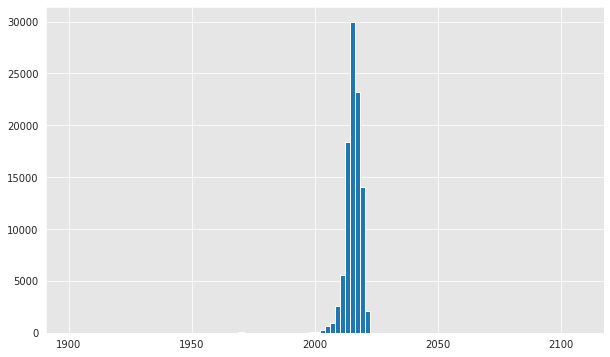

In [63]:
df_donations['Год_донации'].hist(bins=100,figsize=(10,6));

оставим донации с 2000 по 2021 

In [64]:
df_donations.shape

(97867, 11)

In [65]:
df_donations = df_donations.query('2000 < Год_донации <= 2021')
df_donations.shape

(97648, 11)

In [66]:
97867 - df_donations.shape[0]

219

- удалили 7 строк с пропусками в дате донации
- пропусков в данных не осталось
- дубликатов нет
- оставили данации с 2000 по 2021

---

#### df_users

In [67]:
df_users.shape

(158092, 21)

In [68]:
df_users.head(2)

,ID,Пол,Дата_рождения,Регион,Группа_крови,Kell-фактор,Цельная_кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный_мозг,Почетный_донор,Отвод_от_донации,Цельная_кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата_регистрации,Не_подтверждённые_донации
0,158697,Мужской,1986-05-02,"Россия, Москва",Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2021-06-02,0
1,158696,Мужской,1800-01-01,Не указано,Не указано,Не указано,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2021-06-02,0


In [69]:
df_users['Пол'].value_counts()

Не указано    129489
Женский        15424
Мужской        13179
Name: Пол, dtype: int64

In [70]:
df_users = df_users.query('Пол != "Не указано"')
df_users.shape

(28603, 21)

In [74]:
df_users['сегодня'] = pd.to_datetime('today').normalize()

In [75]:
df_users['Возраст'] = (df_users['сегодня'] - df_users['Дата_рождения'])
df_users['Возраст'].sample(5)

13163    7868 days
26868    8758 days
28090    8016 days
32022   17646 days
11107    8027 days
Name: Возраст, dtype: timedelta64[ns]

In [76]:
df_users['Возраст'] = df_users['Возраст'] / np.timedelta64(1, 'Y')
df_users['Возраст'].sample(5)

31727    25.333854
1932     20.170161
9467     30.360651
41006    38.478545
35194    28.895871
Name: Возраст, dtype: float64

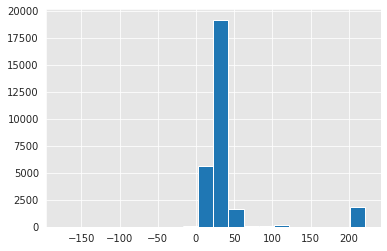

In [77]:
df_users['Возраст'].hist(bins=20);

In [78]:
df_users.dtypes

ID                                    int64
Пол                                  object
Дата_рождения                datetime64[ns]
Регион                               object
Группа_крови                         object
Kell-фактор                          object
Цельная_кровь                        object
Плазма                               object
Тромбоциты                           object
Эритроциты                           object
Лейкоциты                            object
Костный_мозг                         object
Почетный_донор                       object
Отвод_от_донации                     object
Цельная_кровь.1                       int64
Плазма.1                              int64
Тромбоциты.1                          int64
Эритроциты.1                          int64
Лейкоциты.1                           int64
Дата_регистрации             datetime64[ns]
Не_подтверждённые_донации             int64
сегодня                      datetime64[ns]
Возраст                         

In [79]:
df_users['Группа_крови'].value_counts()

Не указано    16498
A(II) Rh+      2987
O(I) Rh+       2955
B(III) Rh+     2031
AB(IV) Rh+     1178
O(I) Rh-        968
A(II) Rh-       818
B(III) Rh-      626
AB(IV) Rh-      465
Не знаю          77
Name: Группа_крови, dtype: int64

In [80]:
df_users = df_users.query('Группа_крови != "Не указано"')
df_users = df_users.query('Группа_крови != "Не знаю"')
df_users.shape

(12028, 23)

In [81]:
df_users['Kell-фактор'].value_counts()

Отрицательный    6046
Положительный    4968
Не указано        628
Не знаю           386
Name: Kell-фактор, dtype: int64

In [82]:
print('анализируемая выборка составит -',round(df_users.shape[0] / 158092, 2),'%  от генеральной совокупности')

анализируемая выборка составит - 0.08 %  от генеральной совокупности


 - очень много данных порезали *(~93%)*
 - убрали всех без определенного пола, и информации о группе крови
 - Kell-фактор и другие пропуски не трогали

---

### Портрет донора

In [83]:
df_users.shape

(12028, 23)

In [84]:
df_users[df_users['ID'] == 1827]

,ID,Пол,Дата_рождения,Регион,Группа_крови,Kell-фактор,Цельная_кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный_мозг,Почетный_донор,Отвод_от_донации,Цельная_кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата_регистрации,Не_подтверждённые_донации,сегодня,Возраст
7864,1827,Мужской,1990-04-21,"Россия, Санкт-Петербург",O(I) Rh+,Положительный,Да,Да,Нет,Нет,Нет,Нет,28.04.2022,Нет,18,0,0,0,0,2020-08-31,0,2021-09-23,31.425697


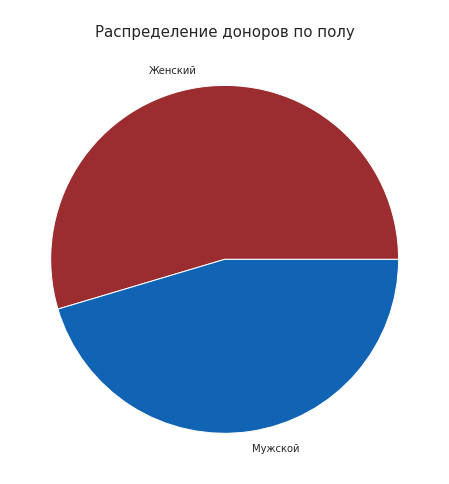

In [85]:
df_users['Пол'].value_counts().plot(kind='pie', figsize=(8,8),label='',colors=['#9B2D30','#1164B4'])
plt.title('\nРаспределение доноров по полу',fontsize=15)
plt.xlabel("\n")
plt.ylabel("\n")
plt.show()

In [86]:
df_users_sex = df_users['Пол'].value_counts(normalize=True).reset_index()
df_users_sex['Пол'] = round(df_users_sex['Пол'],2)
df_users_sex.rename(columns={'index':'пол','Пол':'доля,%'})

,пол,"доля,%"
0,Женский,0.55
1,Мужской,0.45


---

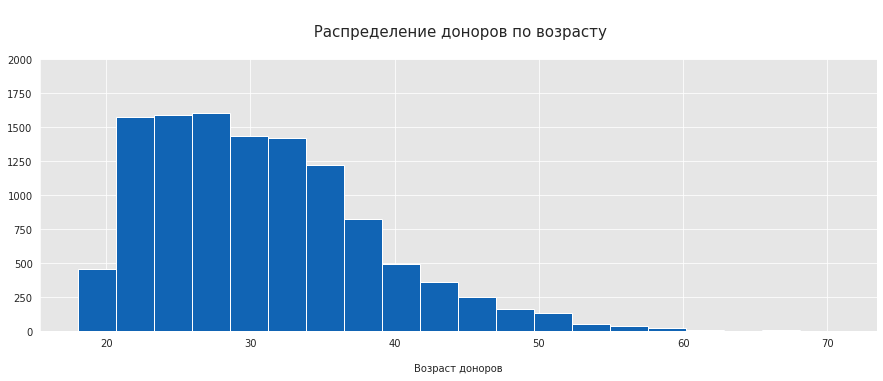

In [87]:
df_users_age = df_users.query('18 < Возраст < 74')
df_users_age['Возраст'].hist(bins=20,figsize=(15,5),color='#1164B4')
plt.title('\n Распределение доноров по возрасту\n',fontsize=15)
plt.ylim([0,2000])
plt.xlabel("\nВозраст доноров")
plt.ylabel("\n")
plt.show()

In [88]:
df_users_age['Возраст'].describe()

count    11690.000000
mean        30.754764
std          7.674525
min         18.018166
25%         24.745888
50%         29.643319
75%         35.225227
max         70.774896
Name: Возраст, dtype: float64

In [89]:
print()
print('Средний возраст донора по среднему арифметическому:',round(df_users_age['Возраст'].mean()),'год')
print()
print('Стандартное отклонение от среднего:',round(df_users_age['Возраст'].std()),'лет')
print()
print('Средний возраст донора по медиане:',round(df_users_age['Возраст'].median()),'лет')
print()


Средний возраст донора по среднему арифметическому: 31 год

Стандартное отклонение от среднего: 8 лет

Средний возраст донора по медиане: 30 лет



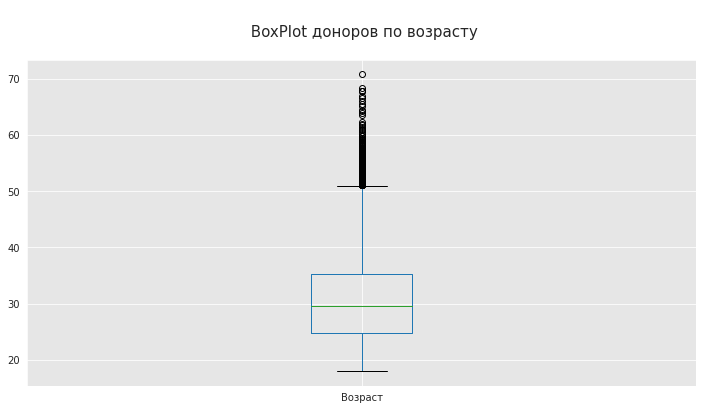

In [90]:
df_users_age.boxplot('Возраст',  figsize=(12,6))
plt.title('\n BoxPlot доноров по возрасту\n', fontsize=15)
plt.show()

---

In [91]:
df_users['total'] = df_users.shape[0]

In [92]:
df_users_groupblood = df_users.groupby(['Пол','Группа_крови']).agg({'ID':len,'total':max}).reset_index()
df_users_groupblood['point'] = df_users_groupblood['ID'] / df_users_groupblood['total'] 
df_users_groupblood

,Пол,Группа_крови,ID,total,point
0,Женский,A(II) Rh+,1586,12028,0.131859
1,Женский,A(II) Rh-,462,12028,0.038410
2,Женский,AB(IV) Rh+,661,12028,0.054955
3,Женский,AB(IV) Rh-,252,12028,0.020951
4,Женский,B(III) Rh+,1113,12028,0.092534
5,Женский,B(III) Rh-,358,12028,0.029764
6,Женский,O(I) Rh+,1565,12028,0.130113
7,Женский,O(I) Rh-,572,12028,0.047556
8,Мужской,A(II) Rh+,1401,12028,0.116478
9,Мужской,A(II) Rh-,356,12028,0.029598


In [93]:
df_users_groupblood['point'].sum()

1.0

In [94]:
df_users_groupblood.query('Пол == "Женский"').groupby('Группа_крови').agg({'point':max})

,point
Группа_крови,
A(II) Rh+,0.131859
A(II) Rh-,0.038410
AB(IV) Rh+,0.054955
AB(IV) Rh-,0.020951
B(III) Rh+,0.092534
B(III) Rh-,0.029764
O(I) Rh+,0.130113
O(I) Rh-,0.047556


In [95]:
df_users_groupblood.query('Пол == "Мужской"').groupby('Группа_крови').agg({'point':max})

,point
Группа_крови,
A(II) Rh+,0.116478
A(II) Rh-,0.029598
AB(IV) Rh+,0.042983
AB(IV) Rh-,0.017709
B(III) Rh+,0.076322
B(III) Rh-,0.022281
O(I) Rh+,0.115564
O(I) Rh-,0.032923


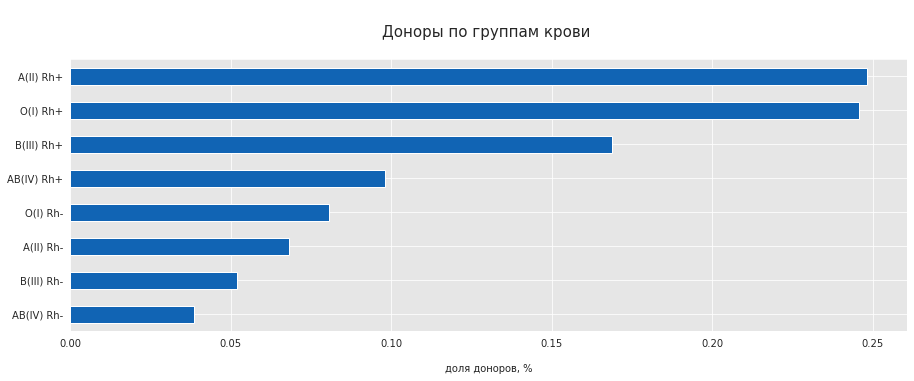

In [96]:
df_users_groupblood.groupby('Группа_крови')\
                   .agg({'point':sum})\
                   .sort_values(by='point')\
                   .plot(kind='barh',legend=False,figsize=(15,5),color='#1164B4')
plt.title('\nДоноры по группам крови \n',fontsize=15) 
plt.xlabel("\nдоля доноров, %")
plt.ylabel("\n")
plt.show()

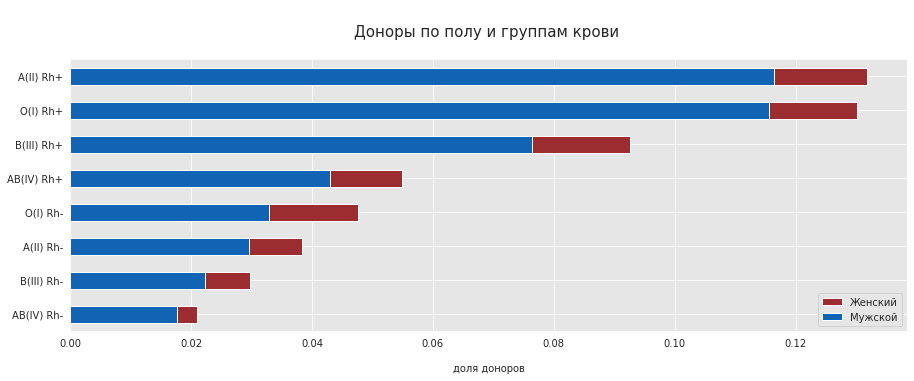

In [97]:
ax = df_users_groupblood.query('Пол == "Женский"').groupby('Группа_крови')\
                         .agg({'point':max})\
                         .rename(columns={'point':'Женский'})\
                         .sort_values(by='Женский')\
                         .plot(kind='barh',legend=True,color='#9B2D30',figsize=(15,5))

df_users_groupblood.query('Пол == "Мужской"')\
                   .groupby('Группа_крови')\
                   .agg({'point':max})\
                   .rename(columns={'point':'Мужской'})\
                   .sort_values(by='Мужской')\
                   .plot(kind='barh',legend=True, ax=ax,figsize=(15,5),color='#1164B4')
                   
plt.title('\nДоноры по полу и группам крови \n',fontsize=15) 
plt.xlabel("\nдоля доноров")
plt.ylabel("\n")
plt.show()

---

In [98]:
df_users.head(2)

,ID,Пол,Дата_рождения,Регион,Группа_крови,Kell-фактор,Цельная_кровь,Плазма,Тромбоциты,Эритроциты,Лейкоциты,Костный_мозг,Почетный_донор,Отвод_от_донации,Цельная_кровь.1,Плазма.1,Тромбоциты.1,Эритроциты.1,Лейкоциты.1,Дата_регистрации,Не_подтверждённые_донации,сегодня,Возраст,total
2,158695,Женский,1995-02-21,"Россия, Санкт-Петербург",O(I) Rh+,Не знаю,Да,Да,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2021-06-02,0,2021-09-23,26.587815,12028
15,158679,Мужской,1987-05-25,"Россия, Татарстан, Альметьевск",O(I) Rh+,Не указано,Да,Нет,Да,Да,Да,Нет,Дата получения не известна,Нет,0,0,0,0,0,2021-06-01,0,2021-09-23,34.333354,12028


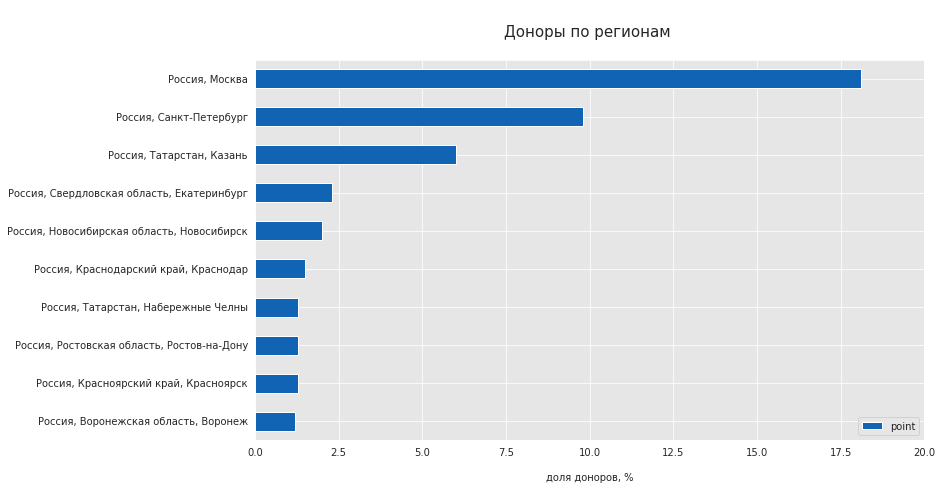

In [99]:
df_users_region = df_users.groupby('Регион').agg({'ID':len,'total':max}).reset_index()
df_users_region['point'] = round(df_users_region['ID'] / df_users_region['total'],3) * 100
df_users_region = df_users_region.sort_values(by='point',ascending=False).head(10)
df_users_region.groupby('Регион').agg({'point':max}).sort_values(by='point',ascending=True).plot(kind='barh', figsize=(12,7),color='#1164B4')
plt.title('\nДоноры по регионам \n',fontsize=15) 
plt.xlim([0,20])
plt.xlabel("\nдоля доноров, %")
plt.ylabel("\n")
plt.show()

---

### Донации

In [100]:
df_donations.head(2)

,ID,ID_пользователя,Класс_крови,Дата_донации,Дата_добавления_донации,Тип_донации,Регион,Место_стадчи,Статус_донации,Есть_справка,Год_донации
0,97920,151894,Плазма,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",647,На модерации,Да,2021
1,97919,156916,Тромбоциты,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",633,На модерации,Да,2021


In [101]:
df_donations.shape

(97648, 11)

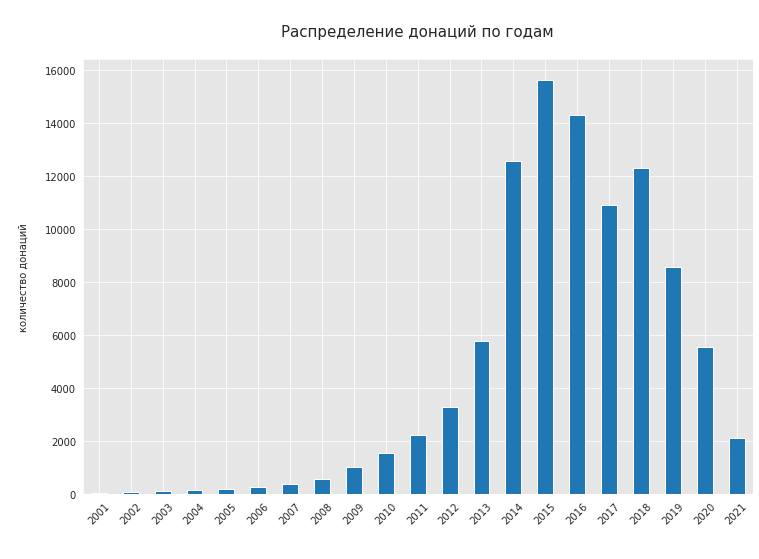

In [103]:
df_donations['Год_донации'].value_counts().reset_index()\
                           .sort_values(by='index')\
                           .plot(kind='bar',y='Год_донации',x='index',figsize=(12,8),legend=False,rot=45)
                           
plt.title('\nРаспределение донаций по годам\n',fontsize=15) 
plt.xlabel("\n ")
plt.ylabel("\nколичество донаций\n")
plt.show()

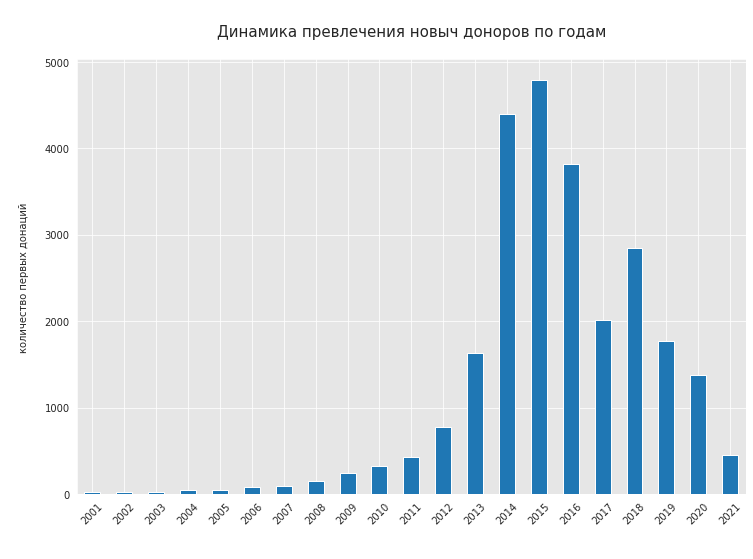

In [104]:
df_donations.groupby('ID_пользователя')\
            .agg({'Год_донации':min})\
            .reset_index()['Год_донации']\
            .value_counts()\
            .reset_index()\
            .sort_values(by='index')\
            .plot(kind='bar',x='index',y='Год_донации',legend=False,figsize=(12,8),rot=45)

plt.title('\nДинамика превлечения новыч доноров по годам\n',fontsize=15) 
plt.xlabel("\n ")
plt.ylabel("\nколичество первых донаций\n")
plt.show()

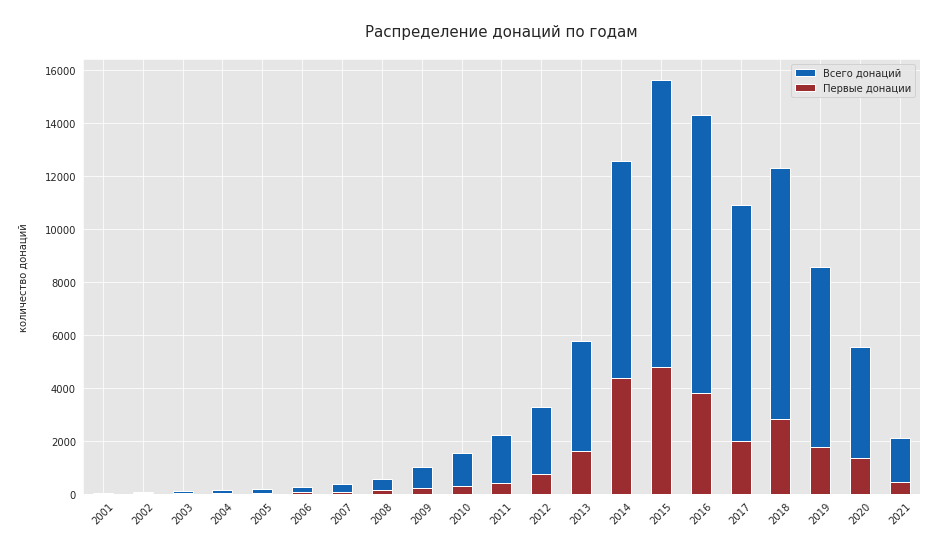

In [105]:
ax = df_donations['Год_донации'].value_counts()\
                                .reset_index()\
                                .sort_values(by='index')\
                                .rename(columns={'Год_донации':'Всего донаций'})\
                                .plot(kind='bar',y='Всего донаций',x='index',figsize=(15,8),legend=True,rot=45,color='#1164B4')

df_donations.groupby('ID_пользователя')\
            .agg({'Год_донации':min})\
            .reset_index()['Год_донации']\
            .value_counts()\
            .reset_index()\
            .sort_values(by='index')\
            .rename(columns={'Год_донации':'Первые донации'})\
            .plot(kind='bar',x='index',y='Первые донации',legend=True,figsize=(15,8),rot=45, ax=ax,color='#9B2D30')     

plt.title('\nРаспределение донаций по годам\n',fontsize=15) 
plt.xlabel("\n ")
plt.ylabel("\nколичество донаций\n")
plt.show()                                  

---

In [106]:
df_donations.head(2)

,ID,ID_пользователя,Класс_крови,Дата_донации,Дата_добавления_донации,Тип_донации,Регион,Место_стадчи,Статус_донации,Есть_справка,Год_донации
0,97920,151894,Плазма,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",647,На модерации,Да,2021
1,97919,156916,Тромбоциты,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",633,На модерации,Да,2021


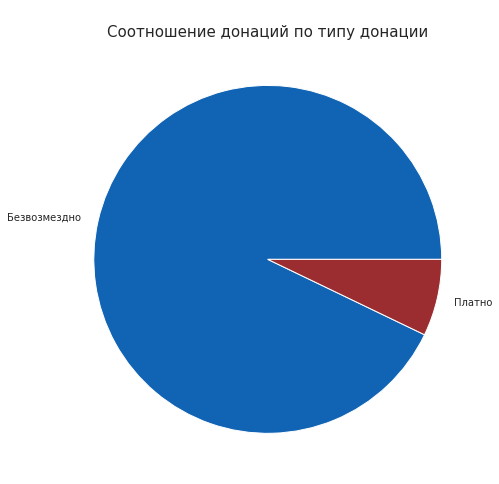

In [107]:
df_donations['Тип_донации'].value_counts().plot(kind='pie', figsize=(8,8),label='',autopct='',colors=['#1164B4','#9B2D30'])
plt.title('\nСоотношение донаций по типу донации',fontsize=15)
plt.xlabel("\n")
plt.ylabel("\n")
plt.show()

In [108]:
df_donations_type = df_donations['Тип_донации'].value_counts().reset_index()
df_donations_type['total'] = df_donations.shape[0]
df_donations_type['point'] = round(df_donations_type['Тип_донации'] / df_donations_type['total'], 2)
df_donations_type = df_donations_type[['index','point']]
df_donations_type.rename(columns={'index':'Тип донации','point':'доля,%'})

,Тип донации,"доля,%"
0,Безвозмездно,0.93
1,Платно,0.07


---

In [109]:
df_donations.head(2)

,ID,ID_пользователя,Класс_крови,Дата_донации,Дата_добавления_донации,Тип_донации,Регион,Место_стадчи,Статус_донации,Есть_справка,Год_донации
0,97920,151894,Плазма,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",647,На модерации,Да,2021
1,97919,156916,Тромбоциты,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",633,На модерации,Да,2021


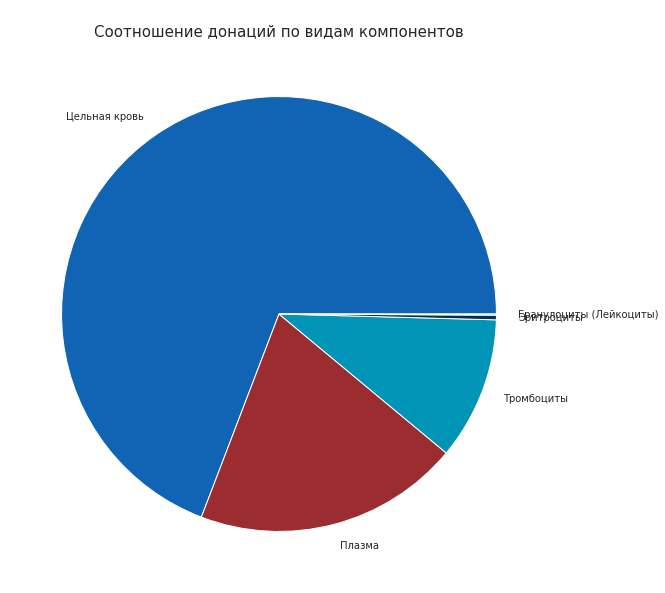

In [110]:
df_donations['Класс_крови'].value_counts()\
                           .plot(kind='pie',
                                 figsize=(15,10),
                                 legend=False,
                                 label=False,
                                 colors=['#1164B4','#9B2D30','#0095B6','#003153'])
plt.title('\nСоотношение донаций по видам компонентов',fontsize=15)
plt.xlabel("\n")
plt.ylabel("\n")
plt.show()

In [111]:
df_donations_class = df_donations['Класс_крови'].value_counts(normalize=True).reset_index()
df_donations_class['Класс_крови'] = round(df_donations_class['Класс_крови'],3)
df_donations_class.rename(columns={'index':'Класс крови','Класс_крови':'доля,%'})

,Класс крови,"доля,%"
0,Цельная кровь,0.692
1,Плазма,0.198
2,Тромбоциты,0.106
3,Эритроциты,0.003
4,Гранулоциты (Лейкоциты),0.001


---

In [112]:
df_donations.head(2)

,ID,ID_пользователя,Класс_крови,Дата_донации,Дата_добавления_донации,Тип_донации,Регион,Место_стадчи,Статус_донации,Есть_справка,Год_донации
0,97920,151894,Плазма,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",647,На модерации,Да,2021
1,97919,156916,Тромбоциты,2021-06-02,2021-06-02,Безвозмездно,"Россия, Москва",633,На модерации,Да,2021


In [113]:
df_donations['ID_пользователя'].value_counts().reset_index()['ID_пользователя'].describe()

count    25378.000000
mean         3.847742
std          7.766126
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        233.000000
Name: ID_пользователя, dtype: float64

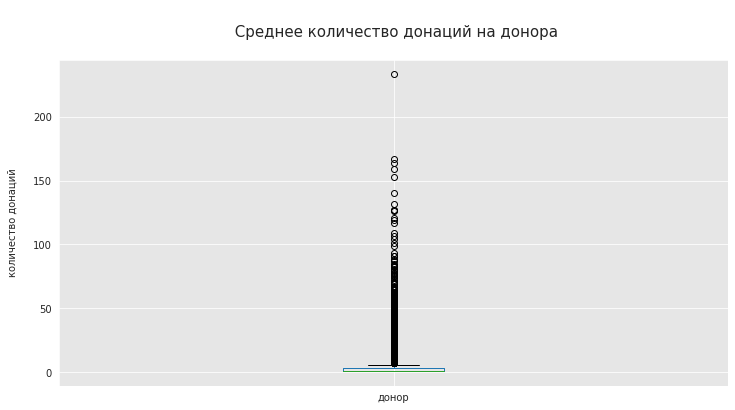

In [114]:
df_donations['ID_пользователя'].value_counts().reset_index().rename(columns={'ID_пользователя':'донор'}).boxplot('донор',  figsize=(12,6))
plt.title('\n Среднее количество донаций на донора\n', fontsize=15)
plt.xlabel("\n")
plt.ylabel("количество донаций\n")
plt.show()

In [115]:
count_mean = df_donations['ID_пользователя'].value_counts().reset_index().query('ID_пользователя < 50')['ID_пользователя'].mean()
count_median = df_donations['ID_пользователя'].value_counts().reset_index().query('ID_пользователя < 50')['ID_пользователя'].median()

print('Среднее арифметическое количество донаций на одного донора: ',round(count_mean,2),'донаций')
print('Среднее количество донаций по медиане на одного донора:     ',round(count_median), 'донация')

Среднее арифметическое количество донаций на одного донора:  3.48 донаций
Среднее количество донаций по медиане на одного донора:      1 донация


In [116]:
df_cnt = df_donations['ID_пользователя'].value_counts().reset_index().query('ID_пользователя < 50')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


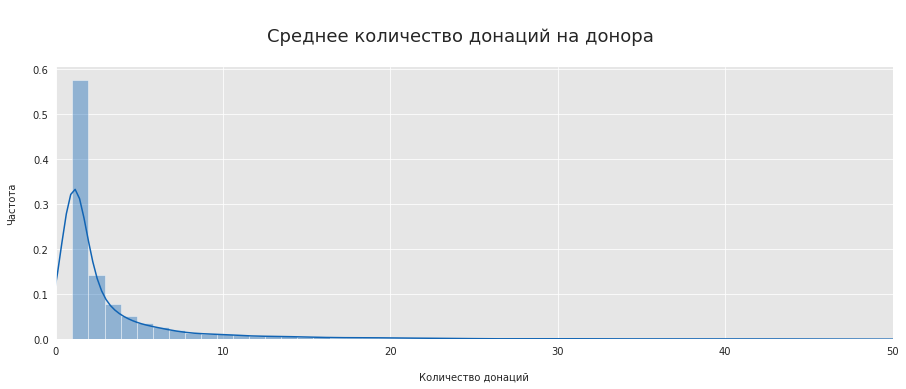

In [121]:
# построим график
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle('\nСреднее количество донаций на донора\n',
             y=1.05,fontsize=18)

sns.distplot(df_cnt['ID_пользователя'],bins=50,color='#1164B4')
sns.despine(left=False, bottom=False)

ax.set_xlim([0, 50])
ax.set_ylabel('Частота\n')
ax.set_xlabel('\nКоличество донаций')
plt.show()

In [118]:
df_cnt.shape[0]

25244

In [119]:
df_cnt.query('ID_пользователя >= 40').shape[0]

116

In [120]:
print('Доля доноров совершивших более 40 донаций: ',round(df_cnt.query('ID_пользователя >= 40').shape[0] / df_cnt.shape[0], 3)*100,'%')

Доля доноров совершивших более 40 донаций:  0.5 %


---

## 4) Презентация

Презентация для заказчика в формате PDF

https://drive.google.com/file/d/1zKXwnXQy1cE5N0o3r9EMieaeyrxBdThg/view?usp=sharing

---